In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import itertools

import warnings
warnings.filterwarnings("ignore")

## Dataset Description

This dataset contains physicochemical and sensory data related to Portuguese "Vinho Verde" wines, focusing on red wine variants. It provides a comprehensive view of wine characteristics for use in machine learning and data analysis.

- **Input Variables**: 11 features derived from physicochemical tests, including:
  - Fixed acidity
  - Volatile acidity
  - Citric acid
  - Residual sugar
  - Chlorides
  - Free sulfur dioxide
  - Total sulfur dioxide
  - Density
  - pH
  - Sulphates
  - Alcohol
- **Output Variable**: `quality`, representing sensory evaluations, scored from 0 to 10.

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) and in https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

### Personal Note
To gain a deeper understanding of the data and its context, I read the referenced article:
**P. Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis.**  
*Modeling wine preferences by data mining from physicochemical properties.*  
Decision Support Systems, Elsevier, 47(4):547-553, 2009. Available [here](https://www.sciencedirect.com/science/article/pii/S0167923609001377)

This helped clarify the significance of the physicochemical variables and their impact on wine quality ratings.



### Project Overview

This Jupyter Notebook showcases an end-to-end analysis of the **"Vinho Verde" wine dataset**, focusing on clustering red wine variants based on their physicochemical properties. The primary goal is to uncover patterns in the data and group wines into meaningful clusters using machine learning techniques.

1. **Data Preprocessing**:
   - Cleaning the dataset by removing duplicates and checking for null values.
   - Standardizing the features to ensure they contribute equally to clustering.

2. **Exploratory Data Analysis (EDA)**:
   - Visualizing box plots to detect outliers in key variables.
   - Using a correlation heatmap to identify relationships between variables.

3. **Dimensionality Reduction**:
   - Applying **Principal Component Analysis (PCA)** to reduce the dataset to its most informative features.
   - Visualizing the explained variance to decide the number of components to retain.

4. **Clustering Analysis**:
   - Determining the optimal number of clusters with the **Elbow Method** and validating results using **Silhouette Analysis**.
   - Applying **KMeans clustering** to group wines into distinct categories.

5. **Cluster Analysis**:
   - Comparing clusters based on mean values of key features.
   - Assigning descriptive names to clusters for better interpretability.
   - Visualizing clusters using scatter plots and pairwise comparisons.

## Tools Used
- **Python Libraries**:
  - `pandas` and `numpy` for data manipulation.
  - `seaborn` and `matplotlib` for visualizations.
  - `scikit-learn` for preprocessing, PCA, and clustering.
  - `yellowbrick` for visualizing clustering metrics.
  - `plotly` for interactive visualizations.
- **Machine Learning Techniques**:
  - Principal Component Analysis (PCA)
  - KMeans Clustering



In [2]:
dt = pd.read_csv('winequality-red.csv')
dt = dt.drop('quality', axis=1)
dt.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [3]:
dt.shape

(1599, 11)

The Dataset have 1599 rows and 11 features

# Features Description

The dataset consists of physicochemical and sensory properties of Portuguese "Vinho Verde" wines. Below is a description of the input and output variables:

## Input Variables (Physicochemical Properties)
1. **Fixed Acidity**: Non-volatile acids that do not evaporate easily (e.g., tartaric acid). Measured in g/dm³.
2. **Volatile Acidity**: Amount of acetic acid in wine, which can lead to an unpleasant vinegar taste if too high. Measured in g/dm³.
3. **Citric Acid**: Adds freshness and flavor to wines. Measured in g/dm³.
4. **Residual Sugar**: The amount of sugar remaining after fermentation. Higher values lead to sweeter wines. Measured in g/dm³.
5. **Chlorides**: Amount of salt in the wine. Measured in g/dm³.
6. **Free Sulfur Dioxide**: SO2 in its free form protects wine from oxidation and microbial growth. Measured in mg/dm³.
7. **Total Sulfur Dioxide**: Sum of free and bound forms of SO2. Too much can affect taste and smell. Measured in mg/dm³.
8. **Density**: Wine density, close to that of water, used to estimate alcohol and sugar content. Measured in g/cm³.
9. **pH**: Describes the acidity or alkalinity of the wine. Most wines have a pH between 3 and 4.
10. **Sulphates**: A wine preservative that contributes to antimicrobial and antioxidant properties. Measured in g/dm³.
11. **Alcohol**: Alcohol content in the wine. Measured as a percentage by volume (% vol).

## Output Variable (Sensory Property)
12. **Quality**: A score assigned to the wine based on sensory evaluations, ranging from 0 (very poor) to 10 (excellent).


# Data Cleaning

In [4]:
dt.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
dtype: object

In [5]:
dt.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [6]:
dt.duplicated().sum()

240

In [7]:
dt = dt.drop_duplicates()


In [8]:
dt.duplicated().sum()

0

# Data Quality Checks and Cleaning

In this section, we perform a series of checks to ensure the quality of the dataset and apply necessary cleaning steps:

1. **Data Types (`dt.dtypes`)**:
   - All features are of type `float64`, confirming that they are numeric and suitable for further analysis.

2. **Missing Values (`dt.isnull().sum()`)**:
   - The dataset has no missing values, as indicated by a sum of `0` for each column.

3. **Duplicate Rows (`dt.duplicated().sum()`)**:
   - Initially, the dataset contains **240 duplicate rows**, which could affect analysis or clustering results.

4. **Removing Duplicates (`dt.drop_duplicates`)**:
   - The duplicate rows are removed, leaving the dataset without any duplicated entries (`0` duplicates remaining).

This cleaning ensures that the dataset is ready for further exploration and modeling without biases caused by duplicates or missing data.


# Exploratory Data Analysis

In [9]:
dt.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


# Statistical Summary of the Dataset

The table above provides a summary of the dataset's numerical features, generated using the `dt.describe()` method. Below are key insights:

1. **Count**:
   - All features have 1,359 observations, indicating no missing values after the data cleaning process.

2. **Mean and Standard Deviation**:
   - The **mean** values give an idea of the central tendency for each feature.
   - The **standard deviation (std)** indicates the spread or variability of the data.

3. **Minimum and Maximum Values**:
   - These values help identify the range for each feature and can indicate potential outliers.

4. **Percentiles (25%, 50%, 75%)**:
   - The percentiles provide information about the data distribution, with:
     - **25% (First Quartile)**: The value below which 25% of observations fall.
     - **50% (Median)**: The middle value when the data is sorted.
     - **75% (Third Quartile)**: The value below which 75% of observations fall.

### Notable Observations:
- **Fixed Acidity**: Varies from 4.6 to 15.9 with a mean of 8.31, showing a wide range of acidity levels.
- **Residual Sugar**: Has a significant range (0.6 to 15.5), with most wines being less sweet (75% ≤ 2.6).
- **Alcohol**: Ranges from 8.4% to 14.9%, with an average of 10.43%, indicating different wine strengths.
- **Total Sulfur Dioxide**: Displays high variability (6 to 289 mg/dm³), suggesting diverse preservation techniques.

This summary provides a comprehensive view of the dataset's distribution and variability, which is crucial for identifying patterns and potential outliers during further analysis.


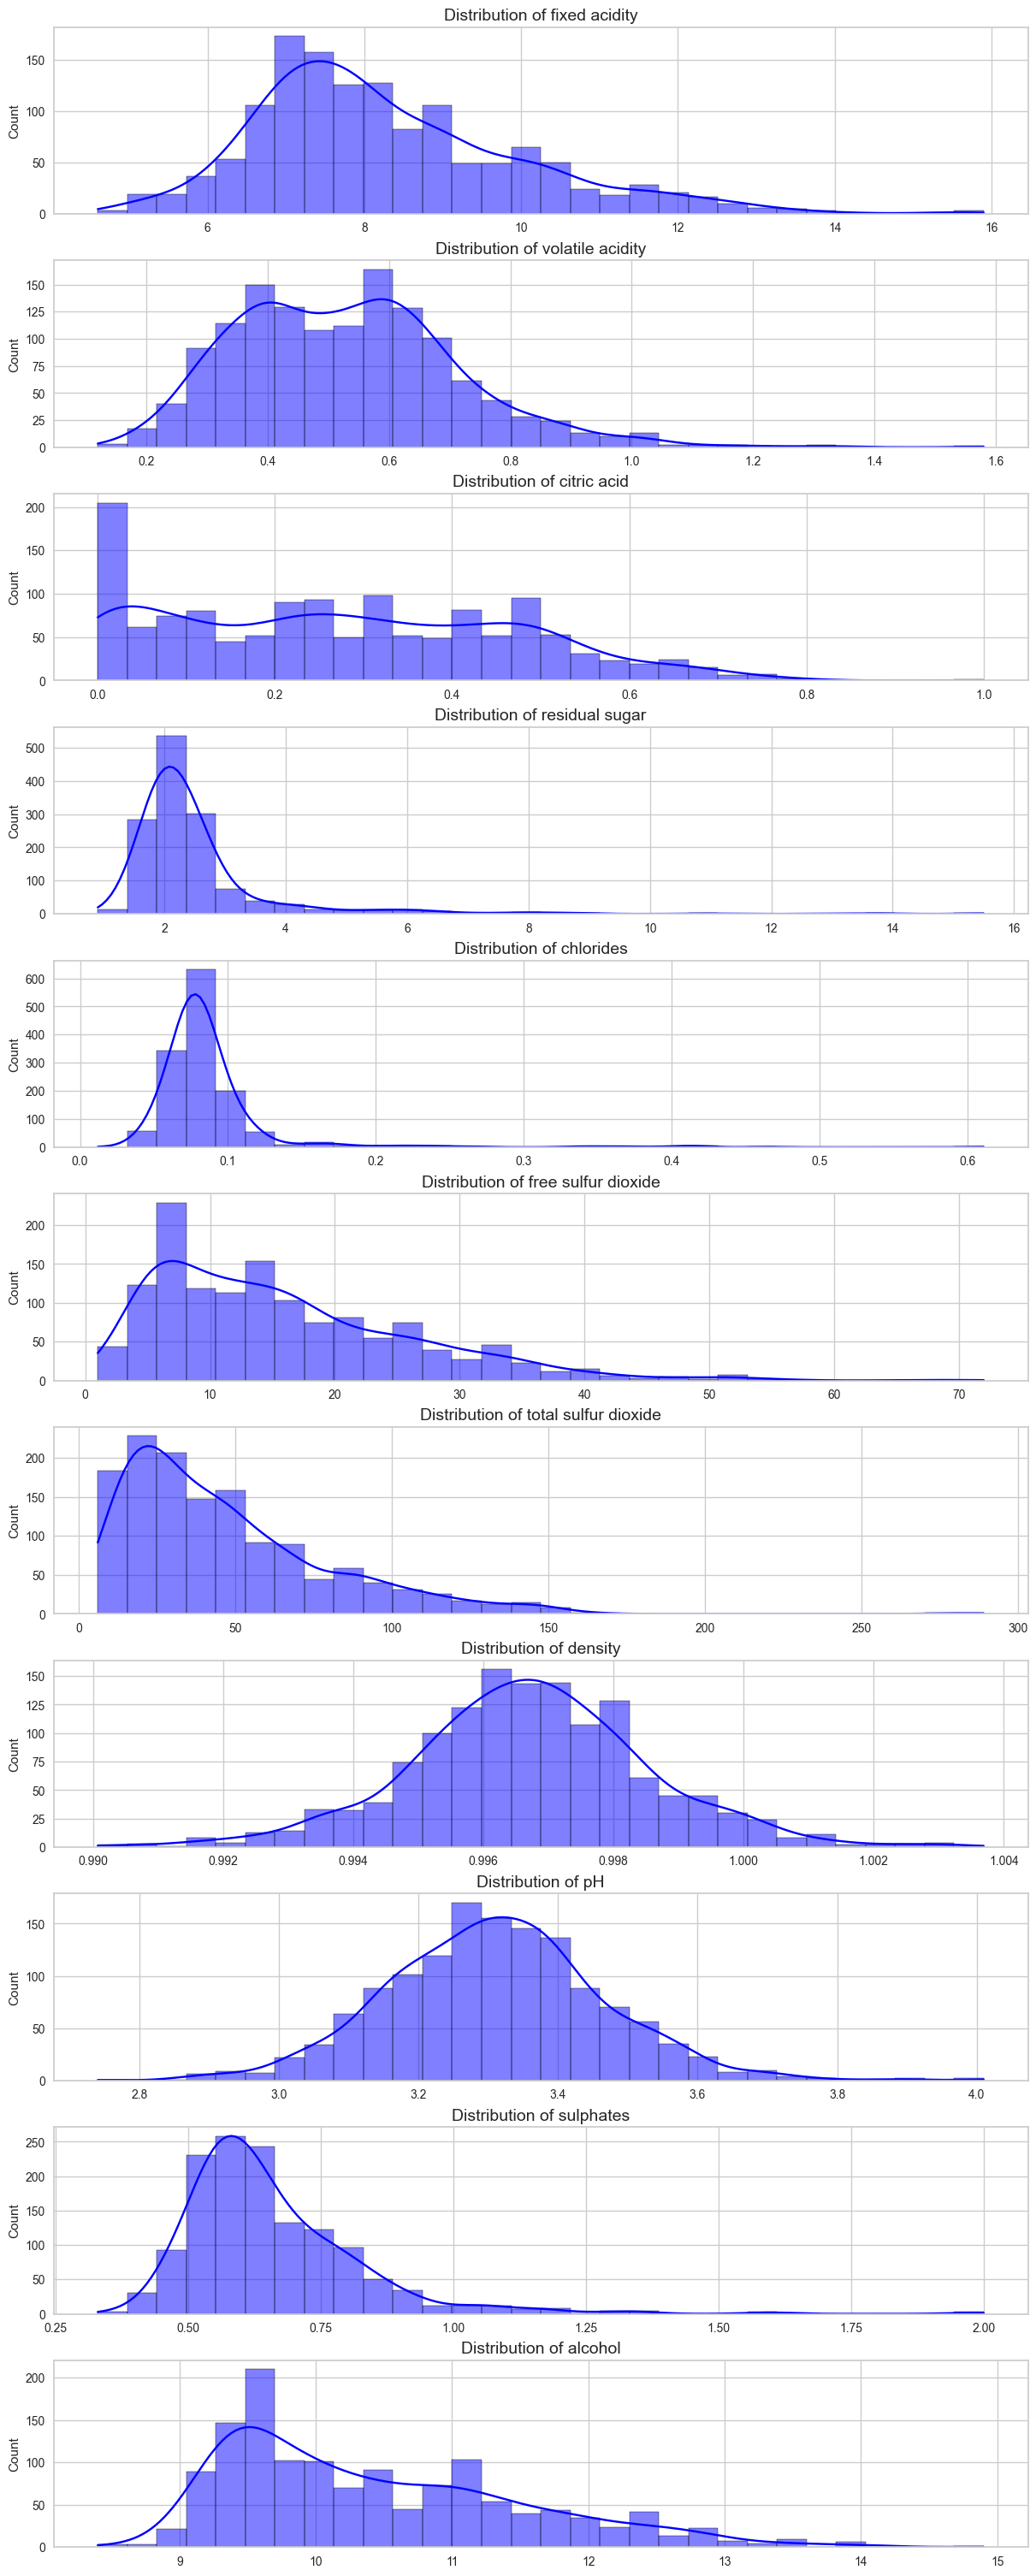

In [10]:
cols = dt.select_dtypes(exclude='object').columns.tolist()

# Histograms of numerical variables
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, 30), constrained_layout=True)
for i, col in enumerate(cols):
    sns.histplot(dt[col], kde=True, ax=ax[i], color='blue', bins=30)
    ax[i].set_title(f"Distribution of {col}", fontsize=14)
    ax[i].set_xlabel("")
plt.show()


The histograms above provide a comprehensive view of the distributions of physicochemical properties in the dataset. Certain features, such as residual sugar, chlorides, and total sulfur dioxide, exhibit a right-skewed distribution, indicating that most wines have relatively low values for these characteristics, with a small number of samples showing higher concentrations. On the other hand, features like fixed acidity, volatile acidity, and pH display distributions closer to normality, suggesting a consistent behavior across the dataset for these properties.

Some features, such as alcohol and density, have broader ranges, highlighting significant variability in these characteristics among the wines. Additionally, the presence of long tails in some distributions, notably residual sugar and chlorides, may point to potential outliers or natural variations stemming from different production processes or wine styles.

These observations underscore the diversity within the dataset, which is crucial for clustering analysis. To ensure that this variability does not disproportionately influence the clustering process, normalization and scaling will play an essential role in the preprocessing steps.

**The analysis of these distributions underscores the importance of understanding the dataset and identifying where features vary the most or the least. This knowledge will be crucial later in the analysis when defining clusters and categorizing them with real-world concepts, ensuring that the groupings are meaningful and interpretable.**

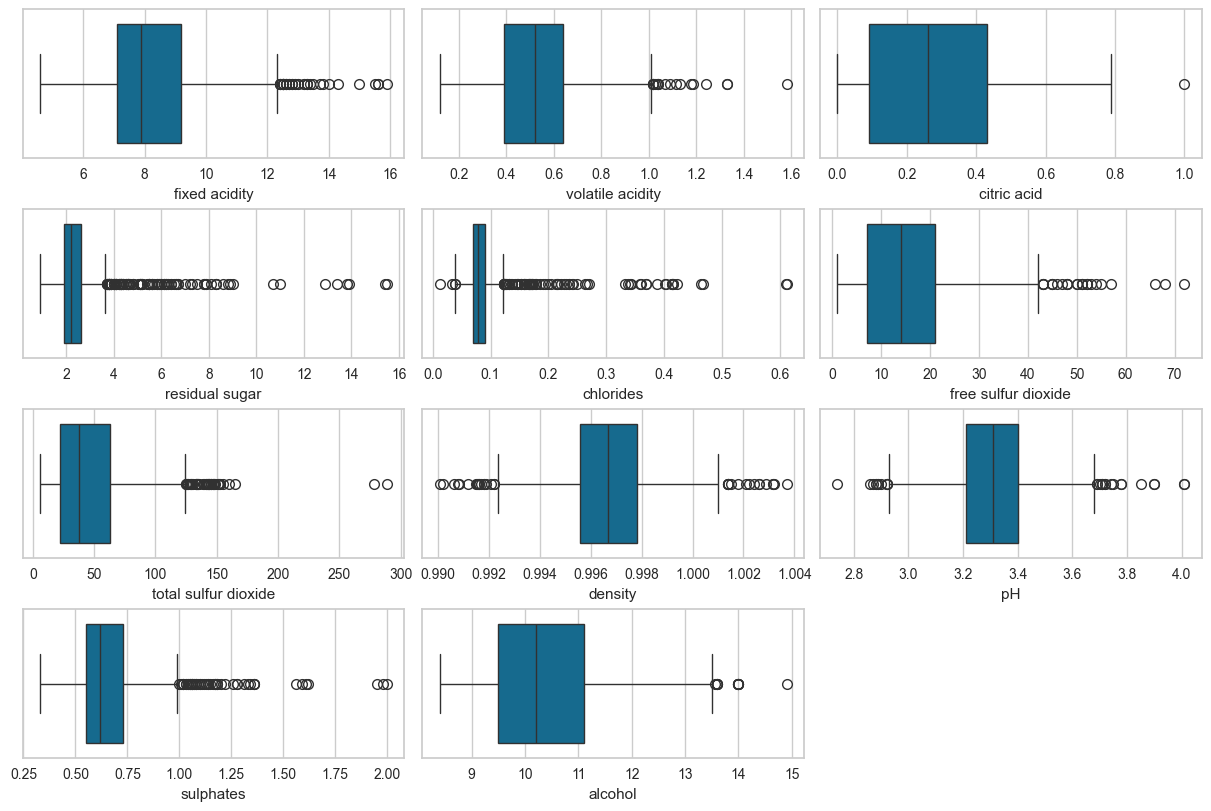

In [11]:
# Calculate the number of rows needed for the subplots based on the number of cols
n_cols = 3
n_rows = -(-len(cols) // n_cols)  # Ceiling division to get enough rows

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8), constrained_layout=True)
ax = ax.flatten()  # This makes it easier to index ax in a loop


for i, col in enumerate(cols):
    sns.boxplot(x=dt[col], ax=ax[i])
for j in range(len(cols), len(ax)):
    ax[j].set_visible(False)

plt.show()

# Analysis of Outliers

The boxplots above highlight the presence of outliers across various physicochemical features in the dataset. These outliers represent extreme values that deviate from the majority of the data points. For example, features like **residual sugar**, **total sulfur dioxide**, and **chlorides** exhibit a significant number of high-value outliers, which may reflect variations in production techniques, wine types, or environmental factors.

Rather than treating these outliers as anomalies, they should be retained in the dataset. These extreme values likely represent **natural variations in wine properties**, which are crucial for understanding the diversity within the dataset. Retaining these outliers ensures that the clustering process captures the full range of characteristics, allowing for more meaningful and representative groupings of the wines.

By maintaining these variations, the clustering analysis can better segment wines into groups that reflect real-world differences, such as sweetness levels, sulfur dioxide concentrations, or alcohol content.


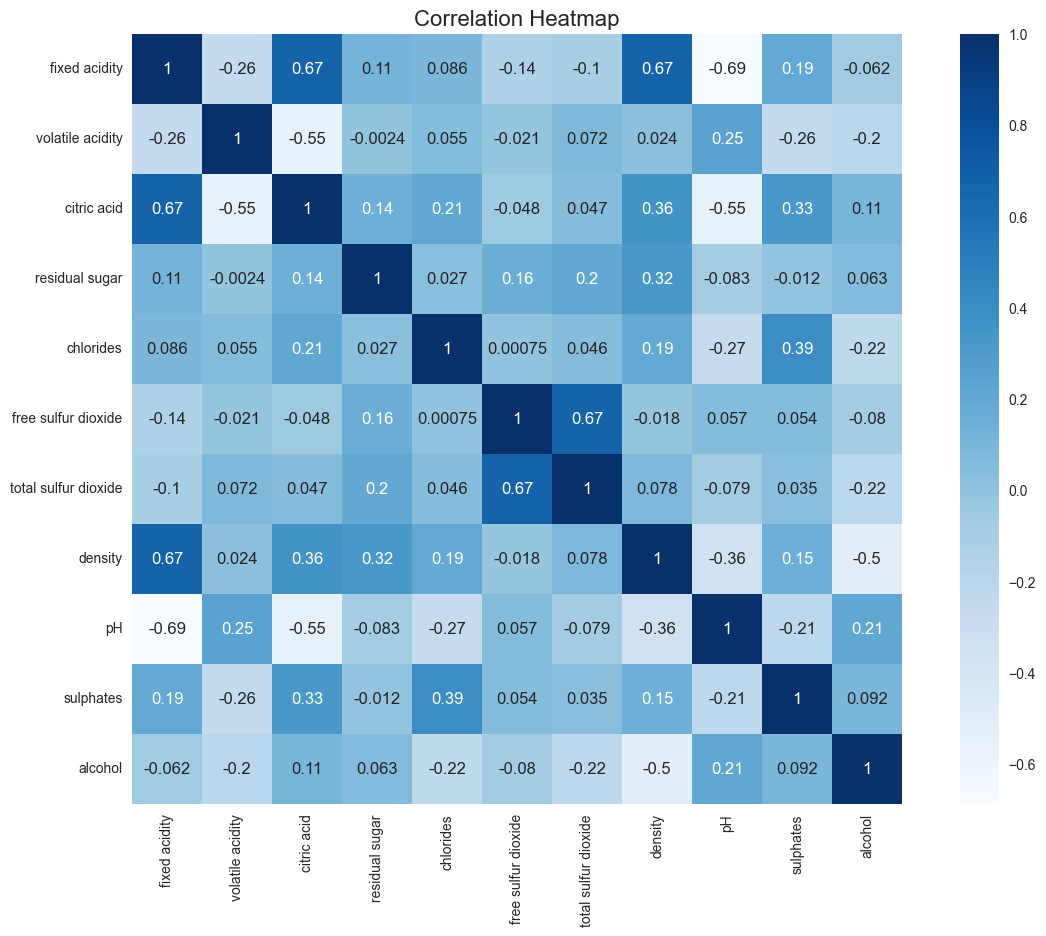

In [12]:
numeric_cols = dt.select_dtypes(include=[np.number]).columns
corr_matrix = dt[numeric_cols].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, square=True, cmap="Blues")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


# Correlation Analysis

The heatmap above illustrates the pairwise correlations between the physicochemical features of the dataset. The correlation values range from -1 to 1:
- **Positive Correlation**: A value close to 1 indicates that as one feature increases, the other tends to increase as well.
- **Negative Correlation**: A value close to -1 indicates an inverse relationship between features.
- **Weak or No Correlation**: A value close to 0 suggests little to no linear relationship.

1. **Strong Positive Correlations**:
   - **Fixed Acidity & Density** (0.67): Wines with higher fixed acidity also tend to have higher density.
   - **Total Sulfur Dioxide & Free Sulfur Dioxide** (0.67): This is expected as free sulfur dioxide contributes to total sulfur dioxide levels.
   - **Residual Sugar & Density** (0.36): Higher sugar levels contribute to increased wine density.
   - **Citric Acid & Fixed Acidity** (0.67): Indicates that wines with higher fixed acidity often have higher levels of citric acid.

2. **Strong Negative Correlations**:
   - **pH & Fixed Acidity** (-0.69): As fixed acidity increases, the pH decreases, reflecting higher acidity levels.
   - **pH & Citric Acid** (-0.55): Higher levels of citric acid correspond to lower pH, which aligns with its role as an acid.

3. **Weak or No Significant Correlations**:
   - **Alcohol & Most Features**: Alcohol content has relatively weak correlations with other variables, with the strongest being density (-0.5) and residual sugar (0.11).
   - **Chlorides**: Chlorides show weak correlations with other features, with the highest being residual sugar (0.21) and sulphates (0.39).

4. **Features to Note for Clustering**:
   - **Density**: Highly correlated with multiple variables (e.g., fixed acidity, residual sugar, alcohol), making it a key feature in distinguishing wines.
   - **pH**: Strong inverse correlations with fixed acidity and citric acid make it an important feature for acidity-related clustering.

5. **Potential Multicollinearity**:
   - **Fixed Acidity & Density**: High correlation may lead to redundancy in clustering; PCA could help address this issue.
   - **Total Sulfur Dioxide & Free Sulfur Dioxide**: These features are almost linearly dependent and might overlap in their contribution to clustering.

The correlation analysis highlights several important relationships between the features. Key variables such as **density**, **pH**, **fixed acidity**, and **sulfur dioxide levels** are expected to play significant roles in distinguishing clusters. The high correlations between some features suggest that dimensionality reduction (e.g., PCA) could be beneficial to mitigate multicollinearity and improve clustering performance.


# Data Normalization

In [13]:
X = StandardScaler().fit_transform(dt)
dt_scaled = pd.DataFrame(data = X, columns = cols)
dt_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.524431,0.932000,-1.393258,-0.461157,-0.245623,-0.468554,-0.384050,0.584003,1.291872,-0.578561,-0.954374
1,-0.294063,1.915800,-1.393258,0.056665,0.200094,0.872003,0.604073,0.048737,-0.708395,0.124822,-0.584575
2,-0.294063,1.259934,-1.188617,-0.165259,0.078535,-0.085537,0.214813,0.155790,-0.321247,-0.051024,-0.584575
3,1.664067,-1.363534,1.471711,-0.461157,-0.265883,0.105971,0.394471,0.691057,-0.966495,-0.461331,-0.584575
4,-0.524431,0.713378,-1.393258,-0.535132,-0.265883,-0.277045,-0.204391,0.584003,1.291872,-0.578561,-0.954374


Normalization is a crucial preprocessing step when working with datasets that contain features on different scales. In this case, the physicochemical properties of the wines (e.g., acidity, sugar, alcohol) have varying ranges. For example:
**Residual Sugar** ranges from 0.6 to 15.5.
**pH** ranges from 2.74 to 4.01.
**Alcohol** ranges from 8.4 to 14.9.

These differences in scale can disproportionately influence machine learning models, especially distance-based algorithms like KMeans clustering, where larger values dominate the distance calculations.

### Approach Used
- **StandardScaler** from `sklearn.preprocessing` was applied to normalize the data.
- StandardScaler transforms each feature by removing its mean and scaling it to unit variance:
  $$
  z = \frac{x - \mu}{\sigma}
  $$
  Where:
  - $x$: the original value of the feature.
  - $\mu$: the mean of the feature.
  - $\sigma$: the standard deviation of the feature.


Normalization brings several important benefits to the analysis. It ensures that all features contribute equally to the clustering process, preventing any single feature with a large magnitude from dominating the results. This step also improves the performance of algorithms like KMeans and PCA by standardizing the data, allowing these methods to operate more effectively. Additionally, normalization enhances interpretability by transforming the values of each feature into the number of standard deviations away from their respective means, making the data easier to understand.

The resulting normalized dataset shows transformed values where those close to 0 represent data points near the mean, positive values indicate data points above the mean, and negative values signify data points below the mean. For instance, the first wine in the dataset has a fixed acidity of -0.52, suggesting that its acidity is slightly below the mean, while its volatile acidity is 0.93, reflecting a value slightly above the mean. This normalization step ensures that the dataset is well-prepared for clustering or dimensionality reduction, minimizing bias caused by varying feature scales and enhancing the reliability of subsequent analyses.


In [14]:
pca = PCA().fit(X)
print(f"Number of components: {pca.n_components_}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

Number of components: 11
Explained variance ratio: [0.28293989 0.17347505 0.14066813 0.11368012 0.08735304 0.05796439
 0.05335491 0.03746183 0.03126706 0.01647314 0.00536244]


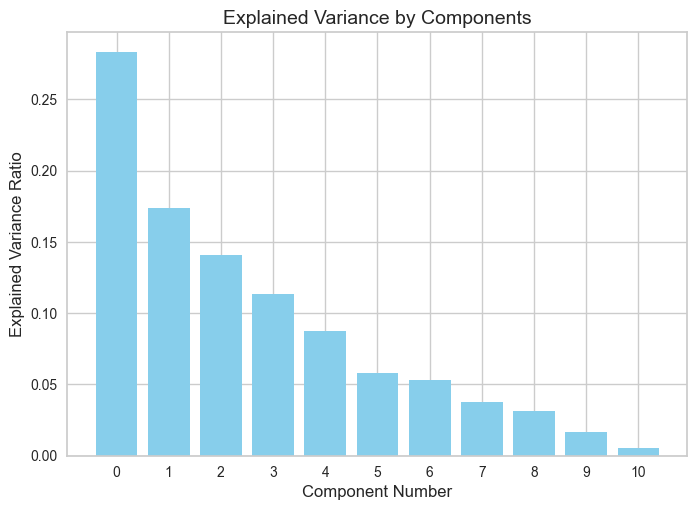

In [15]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color="skyblue")
plt.xlabel('Component Number', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title("Explained Variance by Components", fontsize=14)
plt.xticks(features)
plt.show()

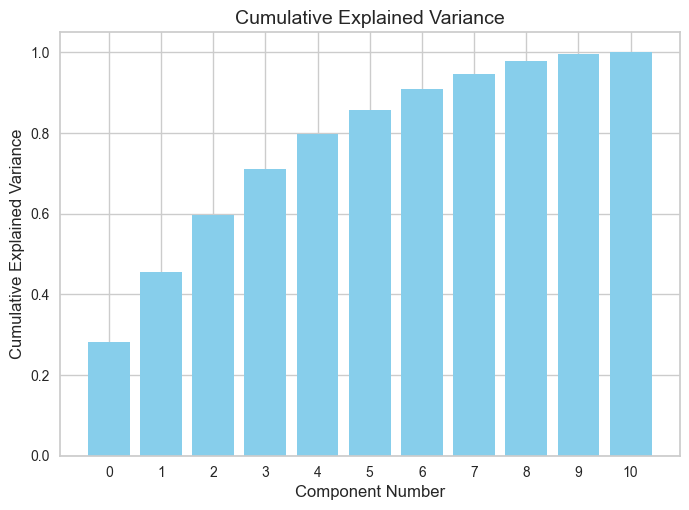

In [16]:
plt.bar(features, pca.explained_variance_ratio_.cumsum(), color="skyblue")
plt.xlabel('Component Number', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title("Cumulative Explained Variance", fontsize=14)
plt.xticks(features)
plt.show()

The two bar plots above illustrate the explained variance ratio and the cumulative explained variance for each principal component obtained through Principal Component Analysis (PCA). The first plot highlights the variance explained by each individual component. The first principal component accounts for approximately 25% of the dataset's variance, while the second and third components explain an additional 20% and 15%, respectively. Each subsequent component contributes progressively less variance, indicating that a significant portion of the dataset's variability can be effectively captured using the first few components.

The second plot demonstrates the cumulative explained variance as the number of principal components increases. By using the first six components, around 90% of the dataset's variance is retained, and extending this to eight components captures over 95% of the variance. This is sufficient for most practical applications and allows for substantial dimensionality reduction without losing critical information.

In conclusion, selecting between six and eight components strikes an optimal balance between reducing dimensionality and preserving enough variance for effective clustering or modeling. This reduced dimensionality simplifies computations, mitigates noise, and enhances the performance of clustering algorithms like KMeans, making PCA an essential preprocessing step for this dataset.


In [17]:
n_components=7
pca = PCA(n_components)
mainComponents = pca.fit_transform(X)
dt_pca = pd.DataFrame(mainComponents, columns=[f"Component_{i+1}" for i in range(n_components)])
print(dt_pca.head())

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -1.617185     0.483047    -1.765381     0.043742     0.011270   
1    -0.759750     1.851902    -0.870782     0.519611     0.112362   
2    -0.729912     0.890227    -1.153382     0.383922     0.022574   
3     2.361030    -0.235496     0.198337    -0.897565    -1.509746   
4    -1.577087     0.604042    -1.532463     0.035250    -0.166895   

   Component_6  Component_7  
0    -0.918062    -0.168433  
1     0.917032    -0.935958  
2     0.401729    -0.476731  
3    -0.087904     0.307927  
4    -0.993503    -0.125875  


In [18]:
pca_weights = pd.DataFrame(
    pca.components_,
    columns=cols,
    index=[f"Component_{i+1}" for i in range(pca.n_components_)]
)

pca_weights.abs().sum().sort_values(ascending=False)

volatile acidity        2.225211
sulphates               2.155503
alcohol                 2.125221
chlorides               2.011320
residual sugar          1.943161
density                 1.872708
fixed acidity           1.518113
total sulfur dioxide    1.373915
free sulfur dioxide     1.339574
pH                      1.334392
citric acid             1.153594
dtype: float64

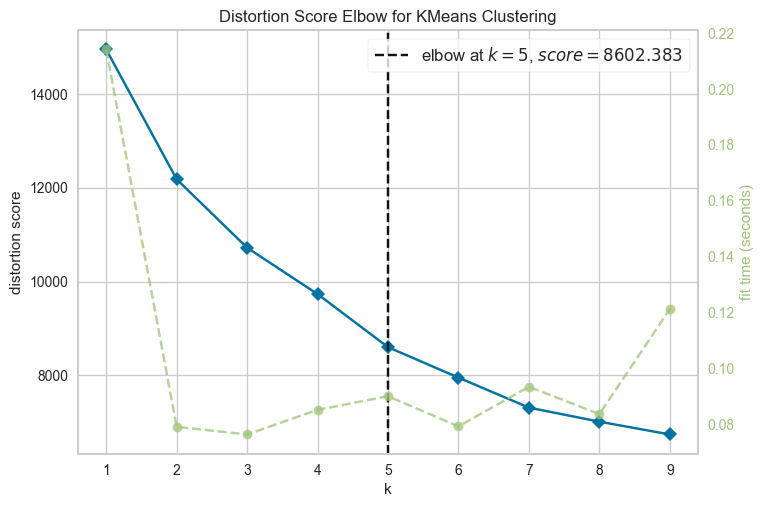

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1,10))
visualizer.fit(X)        
visualizer.show()  

The Elbow Method suggests that \(k = 5\) is the optimal number of clusters. Beyond \(k = 5\), the reduction in distortion slows, making additional clusters less beneficial.

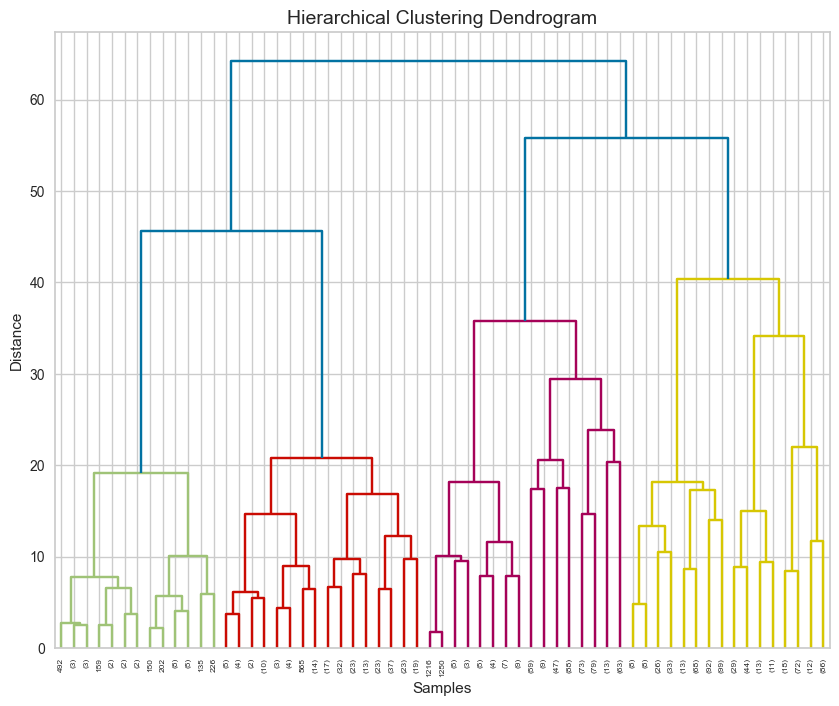

In [20]:
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram", fontsize=14)
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

The dendrogram reinforces the hierarchical analysis and suggests that 4 clusters are adequate, but it also shows that there is significant variation within the larger groups, which can be explored to gain further insights. This analysis is essential to understand the complexity of the data and how the different groups relate to each other.

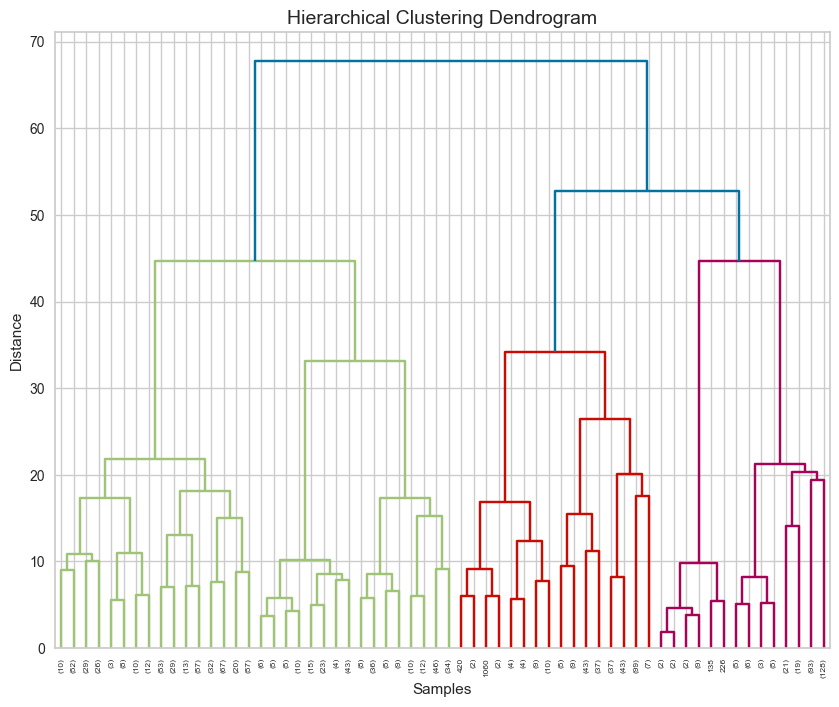

In [21]:
linkage_matrix = linkage(dt_pca, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram", fontsize=14)
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


Compared to the previous dendrogram, the graph now suggests that 3 clusters may be more appropriate.

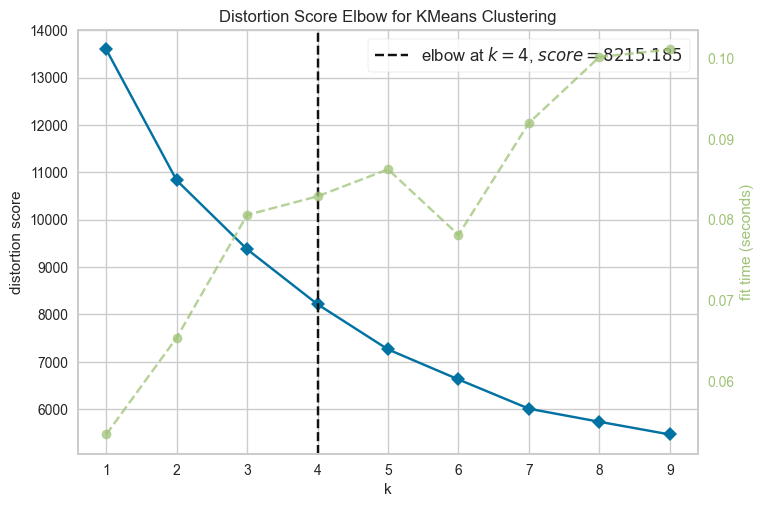

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1,10))
visualizer.fit(dt_pca)        
visualizer.show()  

After applying PCA, the Elbow Method suggests \(k = 4\) as the optimal number of clusters. This reduces noise and redundancy compared to the original data, where \(k = 5\) was suggested.


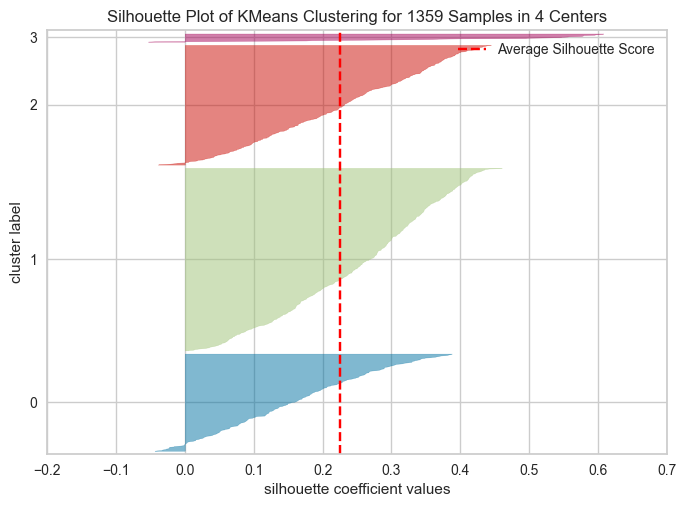

0.22477299663316497

In [23]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, init="k-means++", random_state=42), colors='yellowbrick')
visualizer.fit(dt_pca)
visualizer.show()
silhouette_score(dt_pca, visualizer.estimator.labels_)


The small size and poor definition of Cluster 3 highlight that \(k = 4\) introduces unnecessary complexity. This supports re-evaluating the clustering with fewer clusters, such as \(k = 3\), to improve clarity and balance.


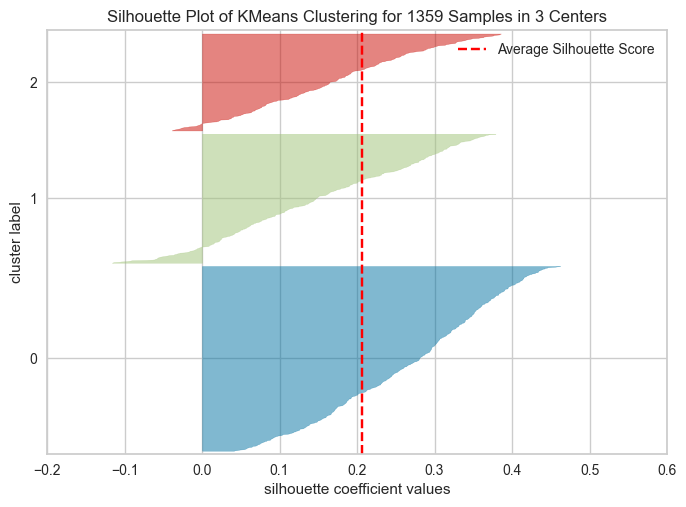

0.20618191222105367

In [24]:
visualizer = SilhouetteVisualizer(KMeans(n_clusters=3, init="k-means++", random_state=42), colors='yellowbrick')
visualizer.fit(dt_pca)
visualizer.show()
silhouette_score(dt_pca, visualizer.estimator.labels_)


 All three clusters are well-defined with predominantly positive silhouette values, confirming \(k = 3\) as the better choice for clustering.


In [25]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
k_means = kmeans.fit(dt_pca)

print(f"Number of clusters: {k_means.n_clusters}")
print(f"Cluster centers:\n{k_means.cluster_centers_}")
print(f"Inertia: {k_means.inertia_}")

Number of clusters: 3
Cluster centers:
[[-1.40162141 -0.20289504 -0.37954582  0.12654654  0.14253332 -0.05642797
   0.00192476]
 [ 1.78022205 -0.97515183  0.13308545  0.02988229  0.07628965  0.02687674
  -0.07585888]
 [ 0.29980021  1.68336045  0.54540502 -0.28062205 -0.3727836   0.07165459
   0.09724522]]
Inertia: 9376.490573051235


In [26]:
dt_kmeans = dt.copy()
dt_kmeans["clusters"] = k_means.labels_
dt_pca["clusters"] = k_means.labels_
dt_kmeans.head(n=20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,2
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0


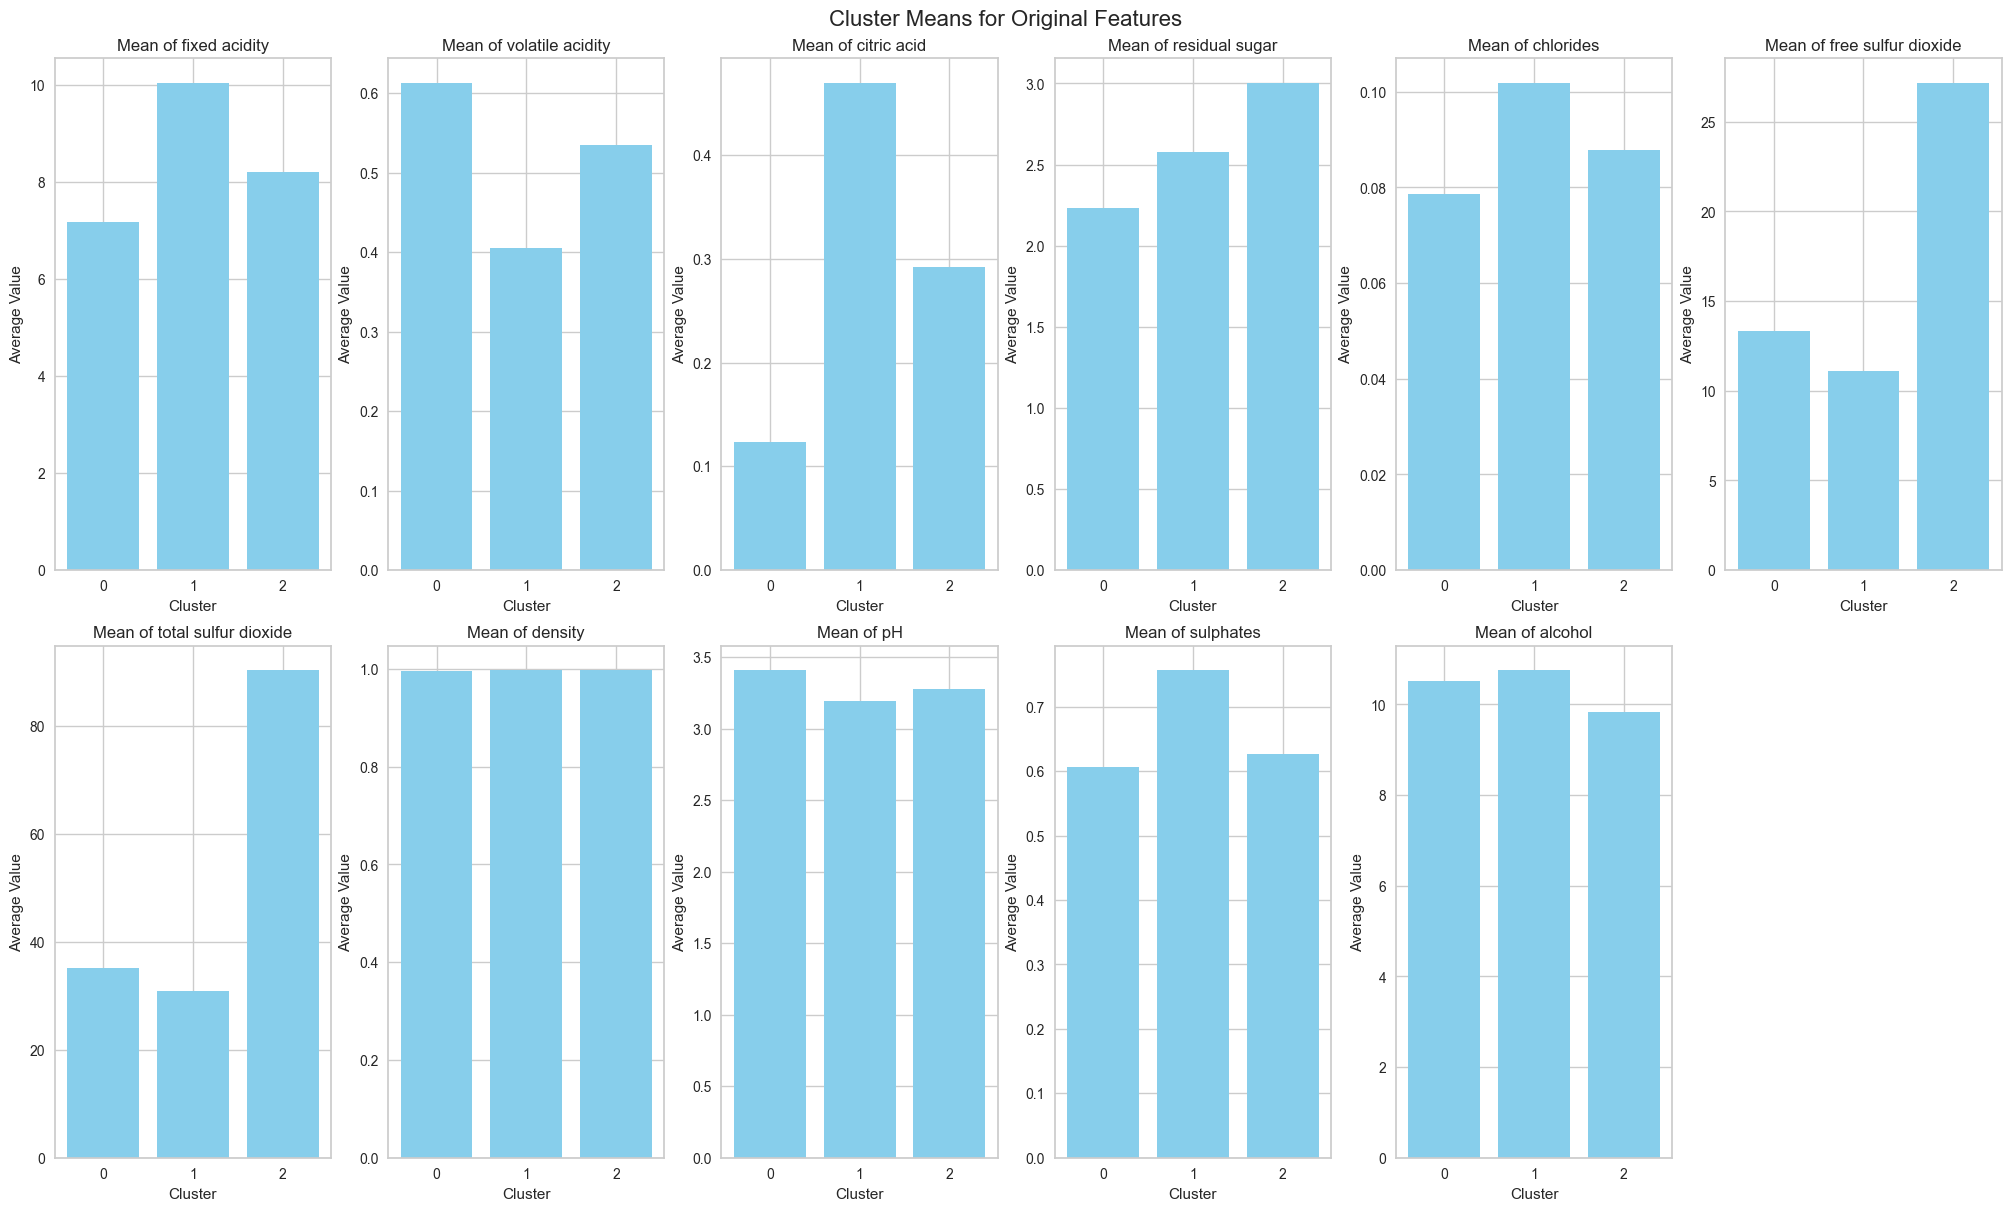

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=int(np.ceil(len(numeric_cols) / 2)), figsize=(20, 12), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    group_means = dt_kmeans.groupby('clusters')[col].mean()
    axs[i].bar(group_means.index.astype(str), group_means.values, color="skyblue")
    axs[i].set_title(f"Mean of {col}")
    axs[i].set_xlabel("Cluster")
    axs[i].set_ylabel("Average Value")

for j in range(len(numeric_cols), len(axs)):
    axs[j].set_visible(False)

plt.suptitle("Cluster Means for Original Features", fontsize=16)
plt.show()

# Cluster Analysis and Characterization

### Cluster 0: **Balanced Wines**
- **Acidity**: Moderate fixed acidity and citric acid levels.
- **Volatile Acidity**: Relatively low compared to Cluster 1.
- **Sugar and Alcohol**: Moderate residual sugar and alcohol content.
- **Sulfur Dioxide**: Low levels of both free and total sulfur dioxide.
- **Chlorides**: Low chloride content.
- **pH**: Moderate pH values, indicating balanced acidity.

These wines have balanced characteristics and are likely versatile and neutral in flavor.

---

### Cluster 1: **Acidic and Simple Wines**
- **Acidity**: Lowest fixed acidity and citric acid levels but highest volatile acidity.
- **Sugar and Alcohol**: Lower residual sugar and alcohol content.
- **Sulfur Dioxide**: Moderate levels of both free and total sulfur dioxide.
- **Chlorides**: Highest chloride content among clusters.
- **pH**: Slightly lower pH, reflecting higher acidity.

These wines are simpler, more acidic, and less sweet, potentially lighter and sharper in flavor.

---

### Cluster 2: **Rich and Full-Bodied Wines**
- **Acidity**: Highest fixed acidity and citric acid levels, with moderate volatile acidity.
- **Sugar and Alcohol**: Highest residual sugar and alcohol content.
- **Sulfur Dioxide**: Highest levels of both free and total sulfur dioxide.
- **Chlorides**: Moderate chloride content.
- **pH**: Slightly higher pH values, reflecting lower acidity.
- **Sulphates**: Highest sulphates, which may indicate better preservation qualities.

These wines are richer, sweeter, and full-bodied with higher alcohol content and better preservation, likely appealing to those who prefer robust flavors.

---



In [28]:
dt_kmeans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


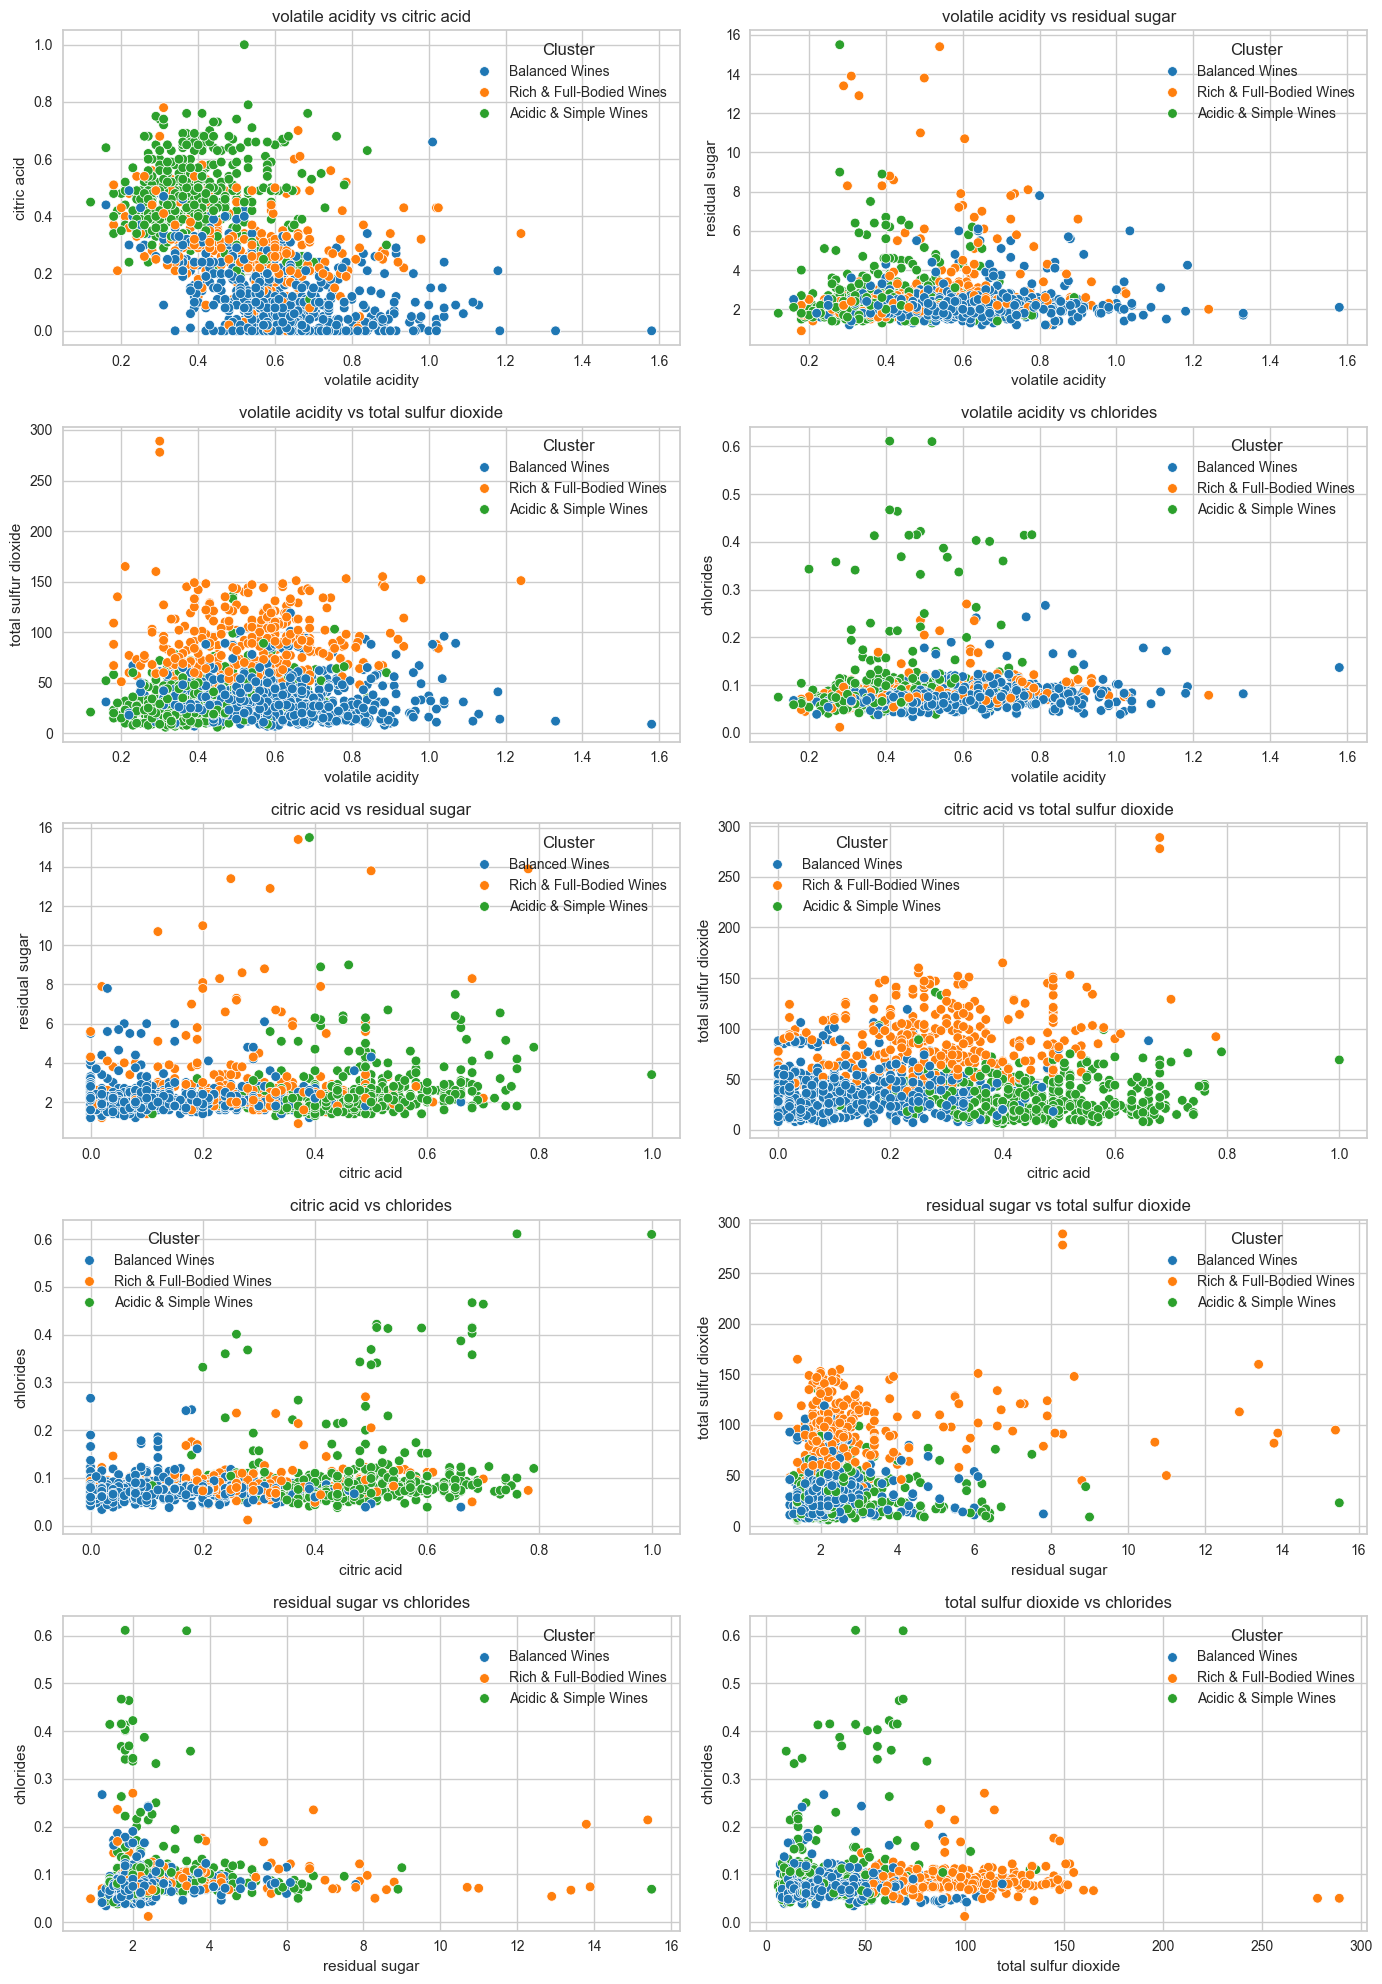

In [29]:
cluster_names = {
    0: "Balanced Wines",
    1: "Acidic & Simple Wines",
    2: "Rich & Full-Bodied Wines"
}
dt_kmeans["cluster_name"] = dt_kmeans["clusters"].map(cluster_names)

important_features = ['volatile acidity', 'citric acid', 'residual sugar', 'total sulfur dioxide', 'chlorides']

pairs = list(itertools.combinations(important_features, 2))

fig, axes = plt.subplots(nrows=len(pairs) // 2 + len(pairs) % 2, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for ax, (feature_x, feature_y) in zip(axes, pairs):
    sns.scatterplot(
        data=dt_kmeans,
        x=feature_x,
        y=feature_y,
        hue="cluster_name",
        palette="tab10",
        ax=ax
    )
    ax.set_title(f'{feature_x} vs {feature_y}')
    ax.legend(title='Cluster')
    ax.grid(True)

for ax in axes[len(pairs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [30]:
cluster_means = dt_kmeans.groupby("cluster_name")[numeric_cols].mean()
cluster_means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
cluster_name,,,,,,,,,,,
Acidic & Simple Wines,10.040281,0.405621,0.469836,2.577869,0.101944,11.103044,30.829040,0.997502,3.193583,0.756979,10.754411
Balanced Wines,7.165957,0.613437,0.123682,2.232242,0.078643,13.310147,35.175123,0.995870,3.408052,0.606678,10.517349
Rich & Full-Bodied Wines,8.188474,0.534424,0.292555,3.005140,0.087785,27.182243,90.281931,0.997250,3.277321,0.627009,9.842004


In [31]:
scaler = StandardScaler()
cluster_means_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means),
    index=cluster_means.index,
    columns=cluster_means.columns
)
cluster_means_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
cluster_name,,,,,,,,,,,
Acidic & Simple Wines,1.324284,-1.310081,1.234541,-0.086090,1.302620,-0.856478,-0.785889,0.875799,-1.126314,1.403181,0.991225
Balanced Wines,-1.091913,1.116306,-1.214707,-1.179428,-1.128160,-0.546355,-0.625281,-1.399529,1.303807,-0.854277,0.377946
Rich & Full-Bodied Wines,-0.232371,0.193776,-0.019834,1.265519,-0.174459,1.402833,1.411170,0.523731,-0.177493,-0.548903,-1.369171


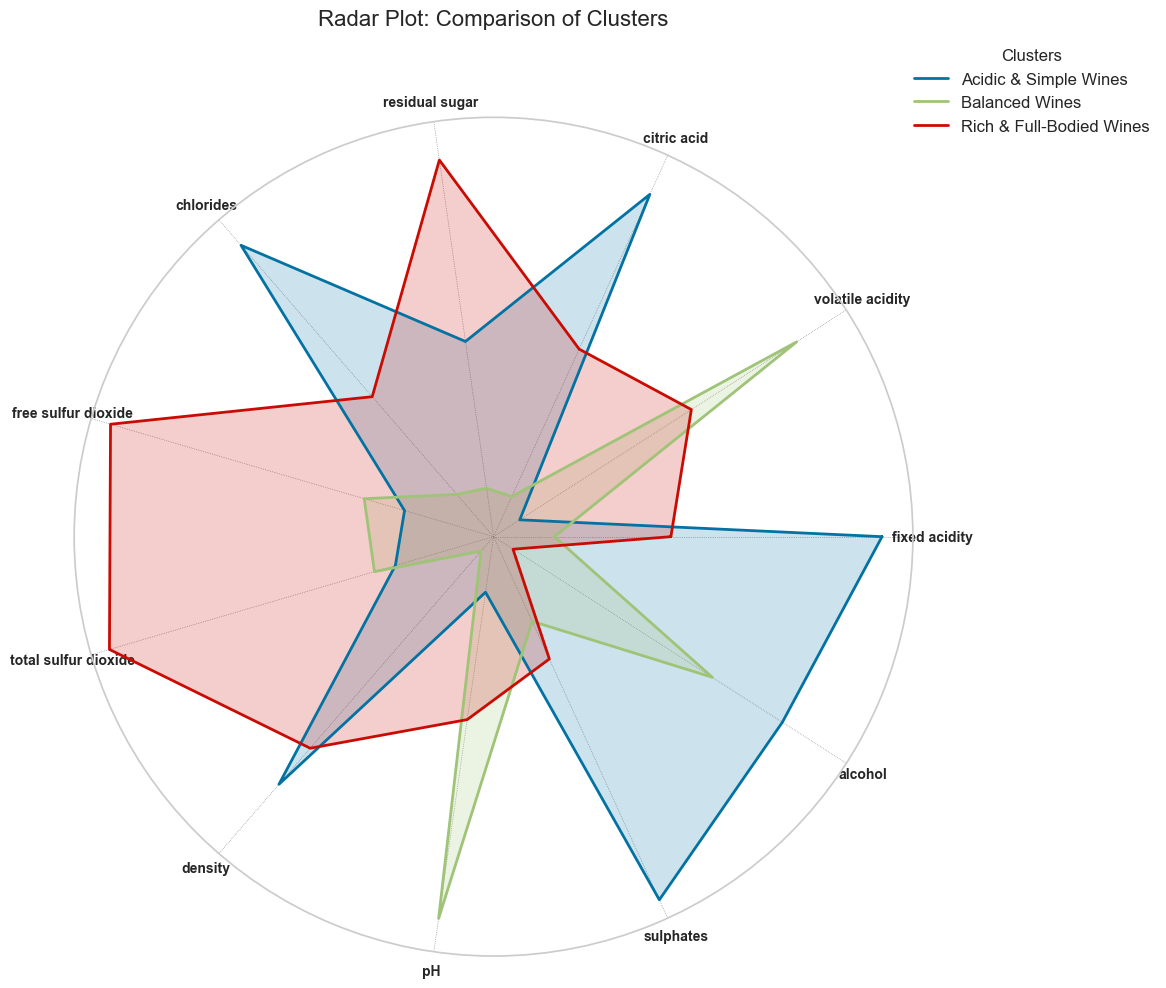

In [32]:
# Configure the radar chart
categories = numeric_cols
num_vars = len(categories)

# Create angles for each category
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Close the plot by repeating the first angle

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))

# Add data for each cluster to the chart
for cluster_name, row in cluster_means_scaled.iterrows():
    values = row.tolist()
    values += values[:1]  # Close the plot by repeating the first value
    ax.plot(angles, values, label=cluster_name, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.2)

# Configure the labels and scale of the chart
ax.set_yticks([])  # Remove radial axis values
ax.set_xticks(angles[:-1])  # Set angular ticks for categories
ax.set_xticklabels(categories, fontsize=10, fontweight='bold')  # Add category labels
ax.set_title("Radar Plot: Comparison of Clusters", fontsize=16, y=1.1)  # Title for the chart
ax.grid(color='gray', linestyle='dotted', linewidth=0.5)  # Add gridlines for reference
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), title="Clusters", fontsize=12)  # Add legend for clusters

# Adjust layout for better spacing and display the chart
plt.tight_layout()
plt.show()


In [33]:
# Rename the cluster column to "wine_type"
dt_kmeans.rename(columns={"clusters": "wine_type"}, inplace=True)

# Export the DataFrame to a CSV file
export_path = "wine_dataset_with_clusters.csv"
dt_kmeans.to_csv(export_path, index=False)  # Save without the index column
